In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline 

In [4]:
import dynadojo as dd
import numpy as np


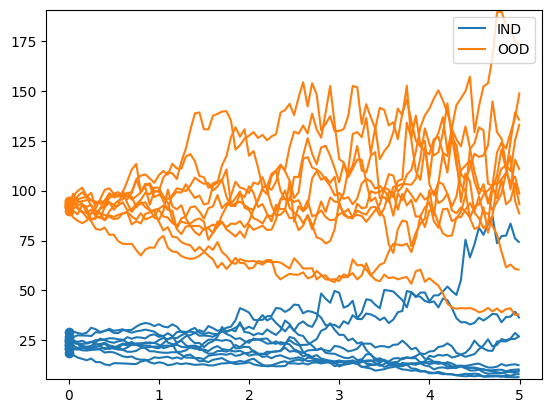

In [12]:
# Black-Scholes-Barenblatt PDE, often used for simulating finacial data and assets management
latent_dim = [40]
embed_dim = 1
n = 10
timesteps = 100
for dim in latent_dim:
    system = dd.systems.fbsnn_pde.BSBSystem(dim, embed_dim, T=5.0)

    x0 = system.make_init_conds(n)
    y0 = system.make_init_conds(n, in_dist=False)

    x = system.make_data(x0, timesteps=timesteps, control=None)
    x_noisy = system.make_data(x0, timesteps=timesteps, noisy=True, control=None)
    y = system.make_data(y0, timesteps=timesteps, control=None)

dd.utils.fbsnn_pde.plot([x, y], timesteps=timesteps, T=5.0, target_dim=1, max_lines=100, labels=["IND", "OOD"])

Instructions for updating:
non-resource variables are not supported in the long term


[deprecation.py:364 -             new_func() ] From /Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/tensorflow/python/compat/v2_compat.py:107: disable_resource_variables (from tensorflow.python.ops.variable_scope) is deprecated and will be removed in a future version.
Instructions for updating:
non-resource variables are not supported in the long term


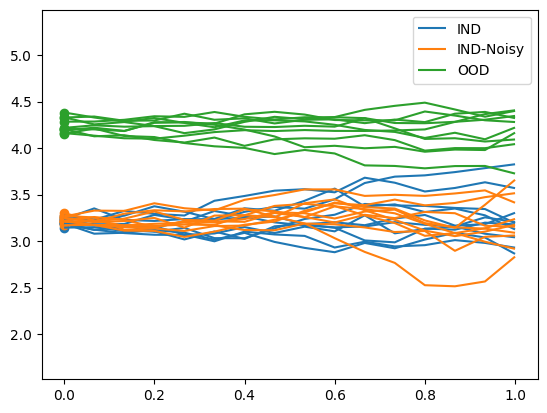

In [5]:
# Hamilton-Jacobi-Bellman PDE, often used for optimal control
latent_dim = [20]
embed_dim = 1
n = 10
timesteps = 15
for dim in latent_dim:
    system = dd.systems.fbsnn_pde.HJBSystem(dim, embed_dim)

    x0 = system.make_init_conds(n)
    y0 = system.make_init_conds(n, in_dist=False)

    x = system.make_data(x0, timesteps=timesteps, control=None)
    x_noisy = system.make_data(x0, timesteps=timesteps, noisy=True, control=None)
    y = system.make_data(y0, timesteps=timesteps, control=None)

dd.utils.fbsnn_pde.plot([x, x_noisy, y], timesteps=timesteps, target_dim=1, max_lines=100, labels=["IND", "IND-Noisy", "OOD"])